# Ôn tập giữa kỳ


In [1]:
# import library...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [ ]:
df = pd.read_csv('data/brfss_2000.csv')

df.shape

(20000, 9)

- Dữ liệu có 20000 và 9 cột

### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [ ]:
# a)
male, female = df['gender'].value_counts(normalize=True)

print(f'Male: {male:.2f}')
print(f'Female: {female:.2f}')

Male: 0.52
Female: 0.48


In [ ]:
# b)
df[df['exerany'] == 1]['genhlth'].value_counts(normalize=True)

# -> Poor: 0.019646

genhlth
very good    0.376827
good         0.264450
excellent    0.261164
fair         0.077913
poor         0.019646
Name: proportion, dtype: float64

### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [ ]:
# a)
df['height'] = df['height'] * 2.54
df['weight'] = df['weight'] * 0.45359237
df['wtdesire'] = df['wtdesire'] * 0.45359237
df.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,177.80,79.378665,79.378665,77,m,good
1,0,1,1,162.56,56.699046,52.163123,33,f,good
2,1,1,1,152.40,47.627199,47.627199,49,f,good
3,1,1,0,167.64,59.874193,56.245454,42,f,good
4,0,1,0,154.94,68.038855,58.967008,55,f,very good


In [ ]:
# b)
df['want_to_lose_weight'] = df['weight'] > df['wtdesire']

df['want_to_lose_weight'].value_counts(normalize=True)

# -> False: 0.6382

want_to_lose_weight
True     0.6382
False    0.3618
Name: proportion, dtype: float64

### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

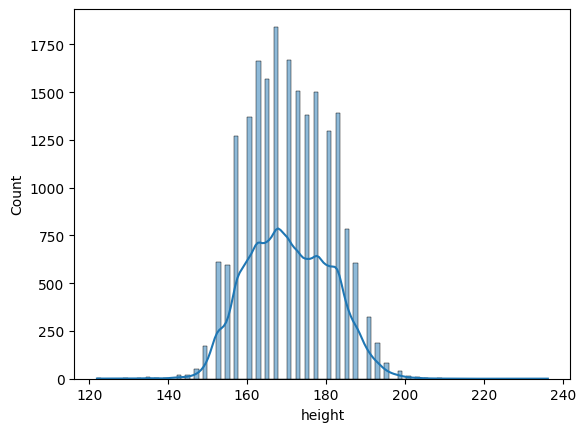

In [21]:
# a)
sns.histplot(df['height'], kde=True)
plt.show()

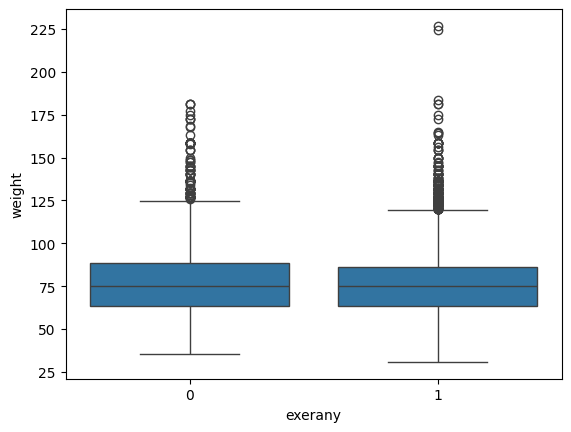

In [23]:
# b)
sns.boxplot(x='exerany', y='weight', data=df)
plt.show()


### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



In [24]:
df['age'].describe()

count    20000.000000
mean        45.068250
std         17.192689
min         18.000000
25%         31.000000
50%         43.000000
75%         57.000000
max         99.000000
Name: age, dtype: float64

### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



In [32]:
no_smoke, smoke = df['smoke100'].value_counts(normalize=True)

print(f'No smoke: {no_smoke:.2f}')
print(f'Smoke: {smoke:.2f}')

No smoke: 0.53
Smoke: 0.47


In [37]:
# Tạo các nhóm tuổi
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 100], 
                        labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])

# Tính toán tỉ lệ hút thuốc theo nhóm tuổi
smoking_by_age = df.groupby('age_group')['smoke100'].value_counts(normalize=True).unstack()
smoking_by_age

C:\Users\trung\AppData\Local\Temp\ipykernel_4824\2820198697.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoking_by_age = df.groupby('age_group')['smoke100'].value_counts(normalize=True).unstack()


smoke100,0,1
age_group,,
0-20,0.637266,0.362734
21-30,0.605435,0.394565
31-40,0.580258,0.419742
41-50,0.486473,0.513527
51-60,0.461704,0.538296
61-70,0.436809,0.563191
71-80,0.460368,0.539632
81+,0.578189,0.421811


### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [39]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

male_bmi = df[df['gender'] == 'm']['bmi'].mean()
female_bmi = df[df['gender'] == 'f']['bmi'].mean()

print(f'Male bmi: {male_bmi:.2f}')
print(f'Female bmi: {female_bmi:.2f}')

Male bmi: 26.93
Female bmi: 25.74


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [40]:
df['is_obese'] = df['bmi'] >= 30

In [41]:
df.groupby('gender')['is_obese'].value_counts(normalize=True).unstack()

is_obese,False,True
gender,,
f,0.814879,0.185121
m,0.798830,0.201170


In [42]:
df.groupby('age_group')['is_obese'].value_counts(normalize=True).unstack()

C:\Users\trung\AppData\Local\Temp\ipykernel_4824\2663064342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['is_obese'].value_counts(normalize=True).unstack()


is_obese,False,True
age_group,,
0-20,0.907387,0.092613
21-30,0.851842,0.148158
31-40,0.796356,0.203644
41-50,0.777806,0.222194
51-60,0.761990,0.238010
61-70,0.768381,0.231619
71-80,0.844642,0.155358
81+,0.911523,0.088477


---